# Tutorial on mdPCA and maasMDS Visualization

In [1]:
import sys, os

dir = os.path.abspath('../')
if not dir in sys.path: sys.path.append(dir)

import logging
from snputils.snp.io.read.vcf import VCFReader
from snputils.ancestry.io.local.read import MSPReader
from snputils.processing.mdpca import mdPCA
from snputils.processing.maasmds import maasMDS
from snputils.processing._utils.gen_tools import logger_config
from snputils.visualization.scatter_plot import scatter

### 1. Load Input Data for mdPCA

Load data files required for running mdPCA, including SNP and LAI data, along with the labels file specifying ancestry labels.

In [2]:
# File paths for SNP data, LAI data, and sample labels
vcf_path = '../data/easComp_6_samples_chr1.vcf'
msp_path = '../data/easComp_6_samples_chr1.msp'
labels_file = '../data/easComp_6_samples_chr1_labels.tsv'

# Load SNP data from VCF file
snpobj = VCFReader(vcf_path).read(sum_strands=False)

# Load LAI data from MSP file
laiobj = MSPReader(msp_path).read()

# Configure logging to display messages in the console
logging.config.dictConfig(logger_config(verbose=True))

### 2. Run mdPCA

Initialize and run the mdPCA analysis.

In [3]:
# Initialize the mdPCA object with SNP and LAI data, labels file, and selected ancestry
mdpca = mdPCA(
    snpobj=snpobj,            # SNP data object
    laiobj=laiobj,            # LAI data object
    labels_file=labels_file,  # File containing sample labels
    ancestry="4",             # Ancestry component to analyze (e.g., '4' for East Asia)
    average_strands=False     # Diploid data
)

[INFO] 2025-01-03 05:18:59: ------ Array 1 Processing: ------
[INFO] 2025-01-03 05:18:59: VCF Processing Time: --- 0.09156608581542969 seconds ---
[INFO] 2025-01-03 05:18:59: TSV Processing Time: --- 0.08198070526123047 seconds ---
[INFO] 2025-01-03 05:18:59: Masking for ancestry 0 --- 0.0006837844848632812 seconds ---
[INFO] 2025-01-03 05:18:59: Masking for ancestry 1 --- 0.0010597705841064453 seconds ---
[INFO] 2025-01-03 05:18:59: Masking for ancestry 2 --- 0.0010416507720947266 seconds ---
[INFO] 2025-01-03 05:18:59: Masking for ancestry 3 --- 0.002353668212890625 seconds ---
[INFO] 2025-01-03 05:18:59: Masking for ancestry 4 --- 0.0014388561248779297 seconds ---
[INFO] 2025-01-03 05:18:59: Covariance Matrix --- 0.1636357307434082 seconds ---
[INFO] 2025-01-03 05:18:59: Percent variance explained by the principal component 1: 40.669909765458044
[INFO] 2025-01-03 05:18:59: Percent variance explained by the principal component 2: 35.32331274768433


In [4]:
print("X_new", mdpca.X_new_)

X_new [[ 0.05753786 -0.07705574]
 [ 0.31123924  0.07635565]
 [-0.14243854 -0.03442202]
 [-0.07117519 -0.22365777]
 [-0.15516337  0.25877988]]


In [5]:
print("samples", mdpca.samples_)
print("haplotypes", mdpca.haplotypes_)
print("n_samples", mdpca.n_samples)
print("n_haplotypes", mdpca.n_haplotypes)

samples ['GA000856_GA000856', 'GA000856_GA000856', 'GA000857_GA000857', 'GA000858_GA000858', 'GA000858_GA000858']
haplotypes ['GA000856_GA000856_A', 'GA000856_GA000856_B', 'GA000857_GA000857_A', 'GA000858_GA000858_A', 'GA000858_GA000858_B']
n_samples 3
n_haplotypes 5


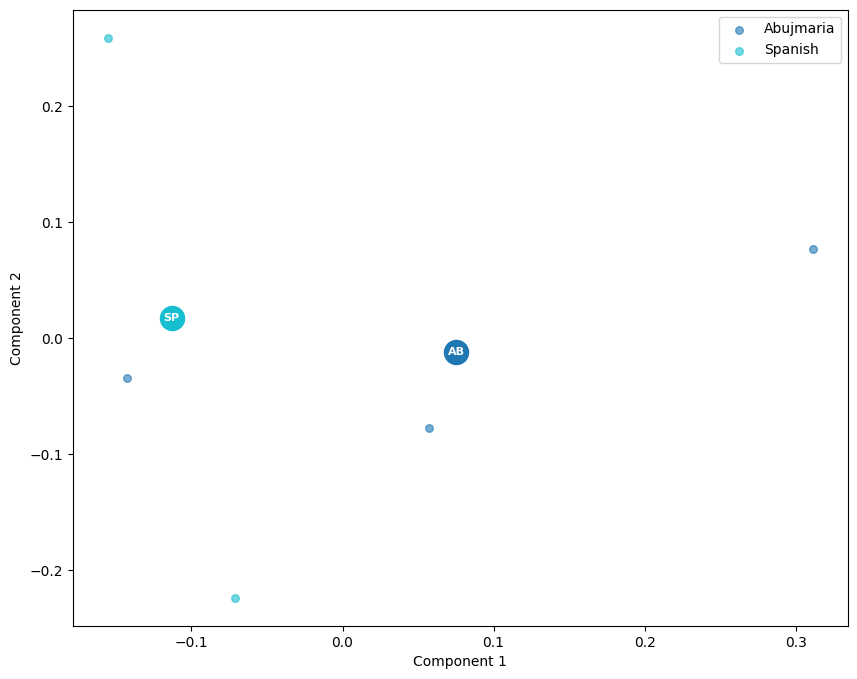

In [7]:
scatter(mdpca, labels_file)

### 3. Run maasMDS

Initialize and run the maasMDS analysis.

In [8]:
# Configure logging to display messages in the console
logging.config.dictConfig(logger_config(verbose=True))

# Initialize the maasMDS object with SNP and LAI data, labels file, and selected ancestry
mds = maasMDS(
    snpobj=snpobj,           # SNP data object
    laiobj=laiobj,           # LAI data object
    labels_file=labels_file, # File containing sample labels
    ancestry="4",            # Ancestry component to analyze (e.g., '4' for East Asia)
    average_strands=False    # Diploid data
)

[INFO] 2025-01-03 05:19:06: ------ Array 1 Processing: ------
[INFO] 2025-01-03 05:19:06: VCF Processing Time: --- 0.16530919075012207 seconds ---


[INFO] 2025-01-03 05:19:06: TSV Processing Time: --- 0.12661957740783691 seconds ---
[INFO] 2025-01-03 05:19:06: Masking for ancestry 0 --- 0.0012772083282470703 seconds ---
[INFO] 2025-01-03 05:19:06: Masking for ancestry 1 --- 0.0015435218811035156 seconds ---
[INFO] 2025-01-03 05:19:06: Masking for ancestry 2 --- 0.0015606880187988281 seconds ---
[INFO] 2025-01-03 05:19:06: Masking for ancestry 3 --- 0.003694772720336914 seconds ---
[INFO] 2025-01-03 05:19:06: Masking for ancestry 4 --- 0.002327442169189453 seconds ---
[INFO] 2025-01-03 05:19:06: Distance Matrix building: --- 0.006646871566772461 seconds ---


In [9]:
print("X_new", mds.X_new_)

X_new [[-0.4475931  -0.02684126]
 [-0.53592473  0.33056938]
 [-0.00128624 -0.34214979]
 [ 0.37509062 -0.60215815]
 [ 0.60971344  0.64057983]]


In [10]:
print("samples", mdpca.samples_)
print("haplotypes", mdpca.haplotypes_)
print("n_samples", mdpca.n_samples)
print("n_haplotypes", mdpca.n_haplotypes)

samples ['GA000856_GA000856', 'GA000856_GA000856', 'GA000857_GA000857', 'GA000858_GA000858', 'GA000858_GA000858']
haplotypes ['GA000856_GA000856_A', 'GA000856_GA000856_B', 'GA000857_GA000857_A', 'GA000858_GA000858_A', 'GA000858_GA000858_B']
n_samples 3
n_haplotypes 5


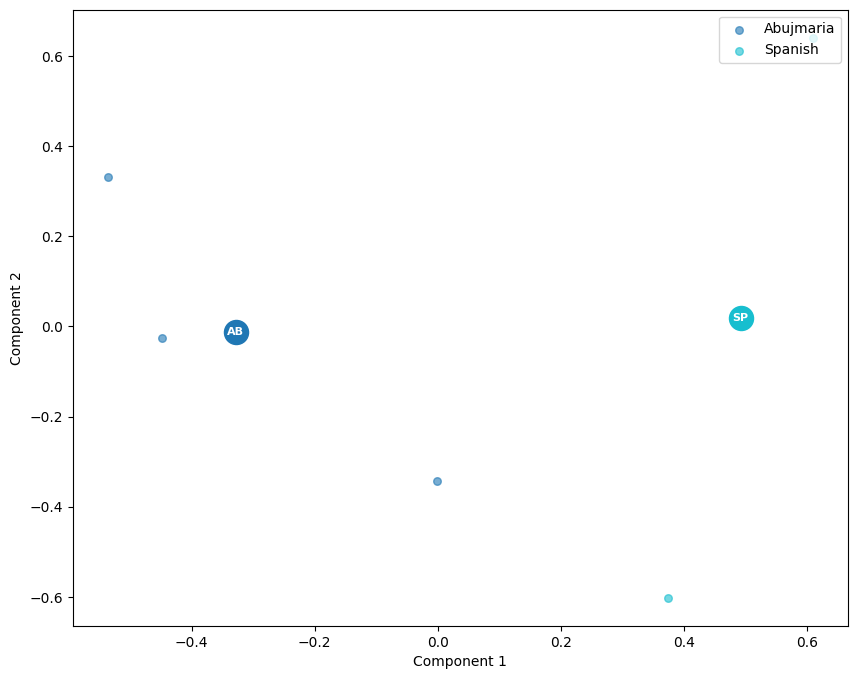

In [11]:
scatter(mds, labels_file)